In [1]:
##Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
import pandas as pd
import time
import os
from os.path import abspath, exists
from scipy.sparse import csc_matrix, find

In [2]:
##Read input image

dirpath = os.getcwd()

img1 = plt.imread(dirpath+'\\Data\\football.bmp') 
img2 = plt.imread(dirpath+'\\Data\\GeorgiaTech.bmp')
img3 = plt.imread(dirpath+'\\Data\\\\bird.jpg')


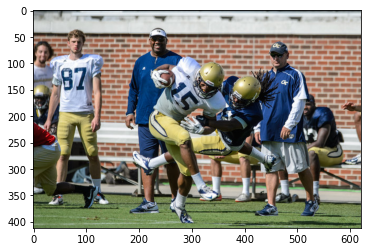

In [3]:
##Image1 preview
plt.imshow(img1) # plotting the image
plt.show() 

In [ ]:
img2 = img1

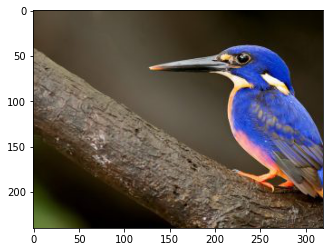

In [5]:
##Image3 preview
plt.imshow(img3) # plotting the image
plt.show() 

In [6]:
##Function to transform an image into a matrix with rows as total number of pixels and 3 columns for each RGB value
##Input: Original image
##Output: Total number of pixels and their value
def ImageTransform(img):
    points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
    X = points.T
    PixelCount = points.shape[0]
    return(X,PixelCount)
    

In [7]:
##Function to execute kmeans clustering on the original pixel values and return an array with updated pixel value as the centroid
##Input: Array of pixel values, count of pixels, number of clusters for k-means algo, number of iterations for k-means
##Output: Cluster centres, array with updated pixel value as the centroid

def KMeansCompression_RandomInit(X,PixelCount,cno):
    
    start_time = time.time()
    
    c = X[:, np.random.randint(X.shape[1], size=(1, cno))[0]]
    iterations = 300
    for itr in range(0,iterations):
        c2 = np.sum(np.power(c.astype('int32'), 2), axis=0, keepdims=True)
        tmpdiff = (2 * np.dot(X.T.astype('int32'), c.astype('int32')) - c2)
        labels = np.argmax(tmpdiff, axis=1)

        k = csc_matrix((np.ones(PixelCount), (np.arange(0, PixelCount, 1), labels)), shape=(PixelCount, cno))
        count = k.sum(axis=0)

        c = np.array((k.T.dot(X.T)).T / count)
        if itr!=0:
            y = np.sum(np.absolute(c0 - c))
            if y<0.005:
                break
        c0 = c
        
    centres = np.round(c,0)
    centres = centres.T
    K_dense = k.todense()
    updated_pixels = K_dense * centres
    updated_pixels = np.array(updated_pixels)
    
    run_time = round(time.time() - start_time ,2)
    print('Code execution time for k=',cno,'is :',run_time,'seconds')
    print('Number of iterations till convergence for k=',cno,'is :',itr,'iterations')

    return(centres,updated_pixels,labels)
    


Code execution time for k= 2 is : 0.79 seconds
Number of iterations till convergence for k= 2 is : 20 iterations
Cluster centres for k= 2 are-
 [[ 73.  75.  66.]
 [189. 181. 171.]]
Image after compression:


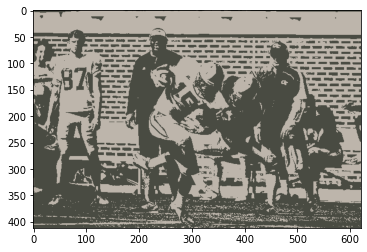

Labels of each pixel: [0 1]
-------------------------------------------------------- 

Code execution time for k= 4 is : 0.76 seconds
Number of iterations till convergence for k= 4 is : 15 iterations
Cluster centres for k= 4 are-
 [[120. 115.  92.]
 [212. 217. 220.]
 [ 35.  42.  45.]
 [181. 166. 147.]]
Image after compression:


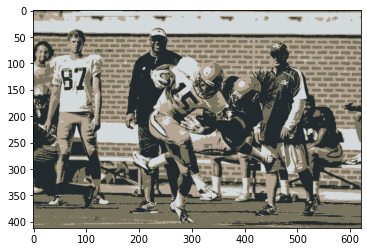

Labels of each pixel: [0 1 2 3]
-------------------------------------------------------- 

Code execution time for k= 8 is : 2.24 seconds
Number of iterations till convergence for k= 8 is : 29 iterations
Cluster centres for k= 8 are-
 [[164. 116.  91.]
 [213. 219. 222.]
 [ 23.  24.  23.]
 [ 71.  69.  52.]
 [189. 173. 154.]
 [112. 125.  87.]
 [123. 135. 144.]
 [ 24.  64. 116.]]
Image after compression:


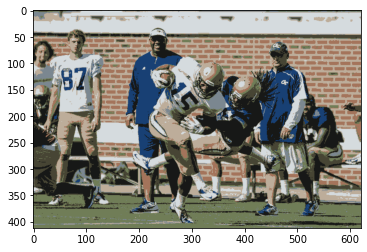

Labels of each pixel: [0 1 2 3 4 5 6 7]
-------------------------------------------------------- 

Code execution time for k= 16 is : 13.93 seconds
Number of iterations till convergence for k= 16 is : 115 iterations
Cluster centres for k= 16 are-
 [[ 88. 102. 116.]
 [ 69.  67.  51.]
 [ 23.  67. 125.]
 [218. 199. 132.]
 [125. 138. 151.]
 [158. 104.  82.]
 [186. 163. 146.]
 [ 46.  41.  27.]
 [ 15.  15.  16.]
 [ 99.  95.  69.]
 [ 15.  37.  69.]
 [185. 182. 178.]
 [172. 140. 112.]
 [119. 140.  89.]
 [199. 206. 212.]
 [226. 230. 233.]]
Image after compression:


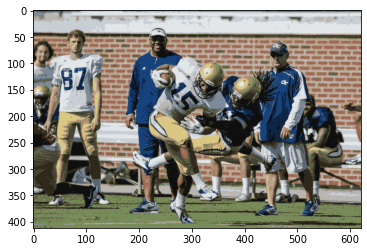

Labels of each pixel: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
-------------------------------------------------------- 



In [8]:
##Transform image to an array of pixels in rows and RGB value in cols
X,PixelCount = ImageTransform(img1)

##Get centroid values, execution time, compressed image and cluster class lables 
for i in (2,4,8,16):
    centroid,modifiedImg,Class = KMeansCompression_RandomInit(X,PixelCount,cno=i)
    print('Cluster centres for k=',i,'are-\n',centroid)

    ##Display recovered image
    recovered = np.reshape(modifiedImg, (img1.shape[0], img1.shape[1],img1.shape[2]))
    print('Image after compression:')
    plt.imshow(recovered.astype('uint8')) # plotting the image
    plt.show() 
    print('Labels of each pixel:',np.unique(Class))

    print('--------------------------------------------------------','\n')

   

Code execution time for k= 2 is : 0.22 seconds
Number of iterations till convergence for k= 2 is : 19 iterations
Cluster centres for k= 2 are-
 [[ 48.  39.  22.]
 [111. 102. 103.]]
Image after compression:


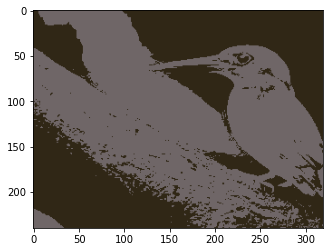

Labels of each pixel: [0 1]
-------------------------------------------------------- 

Code execution time for k= 4 is : 0.1 seconds
Number of iterations till convergence for k= 4 is : 7 iterations
Cluster centres for k= 4 are-
 [[ 90.  79.  62.]
 [ 66.  86. 186.]
 [153. 133. 120.]
 [ 34.  26.  10.]]
Image after compression:


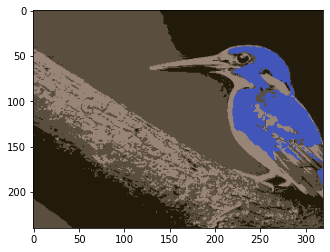

Labels of each pixel: [0 1 2 3]
-------------------------------------------------------- 

Code execution time for k= 8 is : 0.47 seconds
Number of iterations till convergence for k= 8 is : 17 iterations
Cluster centres for k= 8 are-
 [[ 65.  51.  32.]
 [ 42.  32.  12.]
 [103.  92.  76.]
 [ 16.  11.   1.]
 [219. 181. 171.]
 [140. 124. 110.]
 [ 65.  86. 187.]
 [ 84.  72.  56.]]
Image after compression:


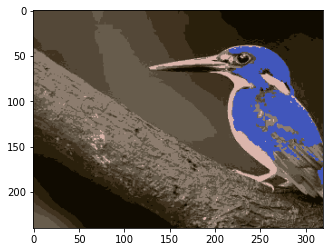

Labels of each pixel: [0 1 2 3 4 5 6 7]
-------------------------------------------------------- 

Code execution time for k= 16 is : 1.01 seconds
Number of iterations till convergence for k= 16 is : 24 iterations
Cluster centres for k= 16 are-
 [[ 88.  78.  62.]
 [ 48.  72. 178.]
 [227. 141.  80.]
 [  6.   2.   1.]
 [ 24.  18.   2.]
 [ 48.  38.  18.]
 [ 61.  46.  22.]
 [ 35.  27.   7.]
 [ 66.  55.  38.]
 [ 80.  66.  47.]
 [103.  92.  75.]
 [ 15.  10.   1.]
 [124. 110.  97.]
 [146. 133. 119.]
 [223. 187. 179.]
 [ 99. 111. 199.]]
Image after compression:


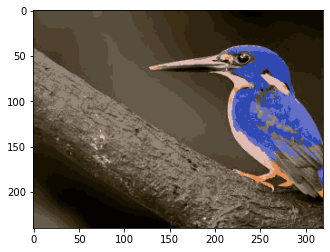

Labels of each pixel: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
-------------------------------------------------------- 



In [10]:
##Transform image to an array of pixels in rows and RGB value in cols
X,PixelCount = ImageTransform(img3)

##Get centroid values, execution time, compressed image and cluster class lables 
for i in (2,4,8,16):
    centroid,modifiedImg,Class = KMeansCompression_RandomInit(X,PixelCount,cno=i)
    print('Cluster centres for k=',i,'are-\n',centroid)

    ##Display recovered image
    recovered = np.reshape(modifiedImg, (img3.shape[0], img3.shape[1],img3.shape[2]))
    print('Image after compression:')
    plt.imshow(recovered.astype('uint8')) # plotting the image
    plt.show() 
    print('Labels of each pixel:',np.unique(Class))

    print('--------------------------------------------------------','\n')



In [11]:
def KMeansCompression_PoorInit(X,PixelCount,cno):
    
    start_time = time.time()
    
    c = X[:,0:cno]
    iterations = 300
    for itr in range(0,iterations):
        c2 = np.sum(np.power(c.astype('int32'), 2), axis=0, keepdims=True)
        tmpdiff = (2 * np.dot(X.T.astype('int32'), c.astype('int32')) - c2)
        labels = np.argmax(tmpdiff, axis=1)

        k = csc_matrix((np.ones(PixelCount), (np.arange(0, PixelCount, 1), labels)), shape=(PixelCount, cno))
        count = k.sum(axis=0)

        c = np.array((k.T.dot(X.T)).T / count)
        if itr!=0:
            y = np.sum(np.absolute(c0 - c))
            if y<0.005:
                break
        c0 = c
        
    centres = np.round(c,0)
    centres = centres.T
    K_dense = k.todense()
    updated_pixels = K_dense * centres
    updated_pixels = np.array(updated_pixels)
    
    run_time = round(time.time() - start_time ,2)
    print('Code execution time for k=',cno,'is :',run_time,'seconds')
    print('Number of iterations till convergence for k=',cno,'is :',itr,'iterations')

    return(centres,updated_pixels,labels)


In [13]:
def KMeansCompression_RandomInit_L1Norm(X,PixelCount,cno):
    
    start_time = time.time()
    
    c = X[:, np.random.randint(X.shape[1], size=(1, cno))[0]]
    iterations = 300
    for itr in range(0,iterations):
        tmpdiff = np.abs(X.T - c.T[:,None] ).sum(-1)
        labels = np.argmin(tmpdiff.T, axis=1)

        k = csc_matrix((np.ones(PixelCount), (np.arange(0, PixelCount, 1), labels)), shape=(PixelCount, cno))
        count = k.sum(axis=0)

        c = np.array((k.T.dot(X.T)).T / count)
        if itr!=0:
            y = np.sum(np.absolute(c0 - c))
            if y<0.005:
                break
        c0 = c
        
    centres = np.round(c,0)
    centres = c
    centres = centres.T
    K_dense = k.todense()
    updated_pixels = K_dense * centres
    updated_pixels = np.array(updated_pixels)
    
    run_time = round(time.time() - start_time ,2)
    print('Code execution time for k=',cno,'is :',run_time,'seconds')
    print('Number of iterations till convergence for k=',cno,'is :',itr,'iterations')

    return(centres,updated_pixels,labels)
    

    

Code execution time for k= 2 is : 0.83 seconds
Number of iterations till convergence for k= 2 is : 12 iterations
Cluster centres for k= 2 are-
 [[190.015855   183.02800817 172.9063193 ]
 [ 75.04523712  76.23328271  66.56475423]]
Image after compression:


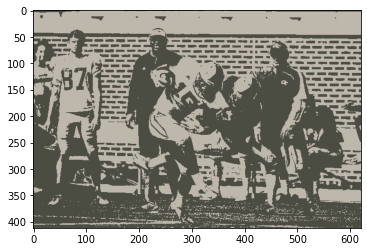

Labels of each pixel: [0 1]
-------------------------------------------------------- 

Code execution time for k= 4 is : 1.3 seconds
Number of iterations till convergence for k= 4 is : 12 iterations
Cluster centres for k= 4 are-
 [[182.20308975 167.25950658 150.69983216]
 [124.03942378 117.94923514  94.14144332]
 [214.26511544 218.18670829 218.28375707]
 [ 37.24269619  43.90199644  47.68700007]]
Image after compression:


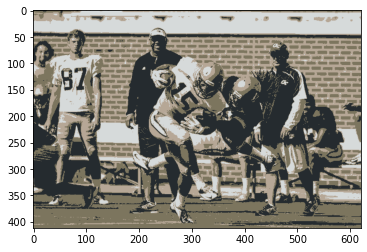

Labels of each pixel: [0 1 2 3]
-------------------------------------------------------- 

Code execution time for k= 8 is : 4.1 seconds
Number of iterations till convergence for k= 8 is : 20 iterations
Cluster centres for k= 8 are-
 [[157.10224135 108.64723079  84.71520221]
 [ 24.27139141  64.5467201  118.12964916]
 [ 26.4047035   26.85417748  25.31186017]
 [116.79606292 132.82328138 106.01762448]
 [184.09231942 163.0292393  137.98858826]
 [220.73110854 224.90091872 225.17972743]
 [187.97047301 187.70650754 188.55709518]
 [ 78.62864816  77.52948374  60.29048045]]
Image after compression:


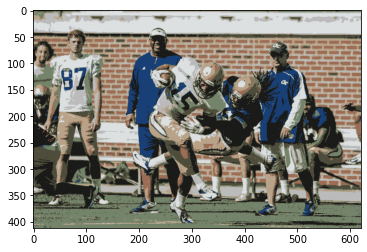

Labels of each pixel: [0 1 2 3 4 5 6 7]
-------------------------------------------------------- 

Code execution time for k= 16 is : 27.72 seconds
Number of iterations till convergence for k= 16 is : 76 iterations
Cluster centres for k= 16 are-
 [[ 84.48318894 102.83828383 124.97731023]
 [ 18.58209536  59.27518084 112.06020067]
 [126.30144023 138.54507    153.45815289]
 [157.03002149 103.02886011  80.50049358]
 [ 18.52869969  19.39106897  21.64299405]
 [188.72767433 176.77512825 167.31854456]
 [216.91967176 221.54160018 222.83569638]
 [108.33396214 120.8313927   78.75938333]
 [124.81499016 145.8698967   94.64984014]
 [182.77639785 158.05032811 136.69672976]
 [ 53.70782082  51.52680375  37.51900129]
 [169.18094001 132.81102362 109.04838055]
 [237.40635947 241.19738615 245.04917812]
 [ 83.72605077  81.05268056  62.95853797]
 [190.78009163 197.14392813 204.15910037]
 [215.28805175 202.42427702 127.01617199]]
Image after compression:


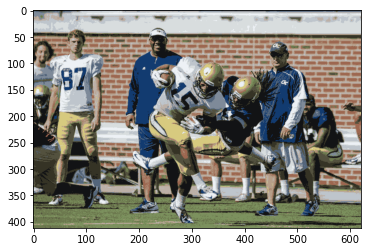

Labels of each pixel: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
-------------------------------------------------------- 



In [14]:
##Transform image to an array of pixels in rows and RGB value in cols
X,PixelCount = ImageTransform(img1)

##Get centroid values, execution time, compressed image and cluster class lables 
for i in (2,4,8,16):
    centroid,modifiedImg,Class = KMeansCompression_RandomInit_L1Norm(X,PixelCount,cno=i)
    print('Cluster centres for k=',i,'are-\n',centroid)

    ##Display recovered image
    recovered = np.reshape(modifiedImg, (img1.shape[0], img1.shape[1],img1.shape[2]))
    print('Image after compression:')
    plt.imshow(recovered.astype('uint8')) # plotting the image
    plt.show() 
    print('Labels of each pixel:',np.unique(Class))

    print('--------------------------------------------------------','\n')

   

Code execution time for k= 2 is : 0.14 seconds
Number of iterations till convergence for k= 2 is : 7 iterations
Cluster centres for k= 2 are-
 [[ 52.07937968  43.25779755  30.82193006]
 [116.67617537 106.50116238 106.3340809 ]]
Image after compression:


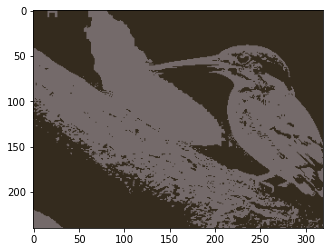

Labels of each pixel: [0 1]
-------------------------------------------------------- 

Code execution time for k= 4 is : 0.57 seconds
Number of iterations till convergence for k= 4 is : 19 iterations
Cluster centres for k= 4 are-
 [[ 36.00245409  27.62996442  12.77467381]
 [ 86.23980909  78.79299054  76.45844549]
 [220.87765727 182.54229935 168.36789588]
 [133.08430295 121.26618602 119.375116  ]]
Image after compression:


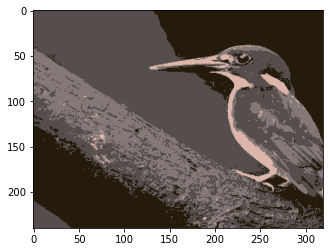

Labels of each pixel: [0 1 2 3]
-------------------------------------------------------- 

Code execution time for k= 8 is : 1.17 seconds
Number of iterations till convergence for k= 8 is : 22 iterations
Cluster centres for k= 8 are-
 [[223.32035647 185.30909944 170.09052533]
 [ 22.69385467  16.66827833   3.68537594]
 [144.32103712 128.70206246 112.61202121]
 [ 48.0601972   72.29346134 179.04981837]
 [ 86.84977673  75.78627497  59.05931845]
 [112.14379029  98.78813924  83.7045982 ]
 [ 58.75633993  46.24652198  26.28428333]
 [101.26897626 111.89957182 197.06383807]]
Image after compression:


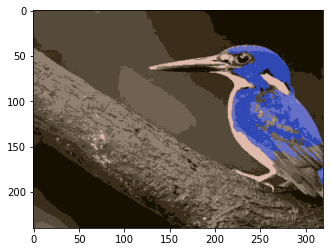

Labels of each pixel: [0 1 2 3 4 5 6 7]
-------------------------------------------------------- 

Code execution time for k= 16 is : 7.22 seconds
Number of iterations till convergence for k= 16 is : 67 iterations
Cluster centres for k= 16 are-
 [[139.05909569 125.29190326 109.53838065]
 [ 98.60740741 115.6047138  213.38047138]
 [ 50.64154104  61.69346734 136.7278057 ]
 [ 69.73793677  56.02634498  36.42886855]
 [240.08222591 200.12126246 177.74169435]
 [ 96.78450034  98.49694086 155.00135962]
 [183.10206422 162.34518349 179.71444954]
 [ 46.96501576  36.57947727  16.06488356]
 [ 92.9253      82.8933      66.2283    ]
 [228.94970986 139.79497099  84.4622824 ]
 [ 18.78873114  13.3216504    2.0068323 ]
 [106.55753196  94.65147304  78.07726515]
 [ 46.01374322  75.5124774  194.30198915]
 [ 82.86832958  70.83622981  53.53322429]
 [124.30436573 109.58443163  93.72837727]
 [154.92001675 140.70854271 126.14070352]]
Image after compression:


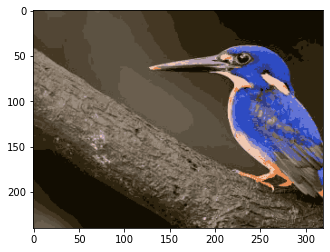

Labels of each pixel: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
-------------------------------------------------------- 



In [16]:
##Transform image to an array of pixels in rows and RGB value in cols
X,PixelCount = ImageTransform(img3)

##Get centroid values, execution time, compressed image and cluster class lables 
for i in (2,4,8,16):
    centroid,modifiedImg,Class = KMeansCompression_RandomInit_L1Norm(X,PixelCount,cno=i)
    print('Cluster centres for k=',i,'are-\n',centroid)

    ##Display recovered image
    recovered = np.reshape(modifiedImg, (img3.shape[0], img3.shape[1],img3.shape[2]))
    print('Image after compression:')
    plt.imshow(recovered.astype('uint8')) # plotting the image
    plt.show() 
    print('Labels of each pixel:',np.unique(Class))

    print('--------------------------------------------------------','\n')

   

Code execution time for k= 4 is : 0.7 seconds
Number of iterations till convergence for k= 4 is : 20 iterations
Cluster centres for k= 4 are-
 [[215.87471526 177.8405467  163.84776006]
 [113.16826587 109.29030485 129.03818091]
 [ 88.28681672  76.4785209   59.18752412]
 [ 33.94856003  26.05625434  11.87170368]]
Image after compression:


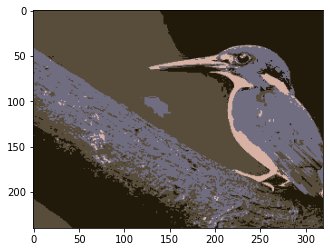

Labels of each pixel: [0 1 2 3]
-------------------------------------------------------- 



In [17]:
##Example run for centroid and median comparison

k=4

##Transform image to an array of pixels in rows and RGB value in cols
X,PixelCount = ImageTransform(img3)


centroid,modifiedImg,Class = KMeansCompression_RandomInit_L1Norm(X,PixelCount,cno=k)
print('Cluster centres for k=',k,'are-\n',centroid)

##Display recovered image
recovered = np.reshape(modifiedImg, (img3.shape[0], img3.shape[1],img3.shape[2]))
print('Image after compression:')
plt.imshow(recovered.astype('uint8')) # plotting the image
plt.show() 
print('Labels of each pixel:',np.unique(Class))

print('--------------------------------------------------------','\n')

   

In [18]:
##Median view
df = pd.DataFrame(X.T)
df.columns = ['R','G','B']
df['label'] = Class.T

df1 = df.groupby('label',as_index=False).median()

print('Median values for each cluster, k=',k)
df1.head()

Median values for each cluster, k= 4


,label,R,G,B
0,0,224,174,166
1,1,123,111,112
2,2,88,77,60
3,3,33,26,6


In [19]:
#End